In [1]:
#Import packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the data
credit=pd.read_csv('Python_Credit_Risk_XTrain.csv')

In [3]:
credit.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#Loan_ID not needed so we can drop
credit.drop(['Loan_ID'],inplace=True,axis=1)

In [5]:
credit.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#Data Preprocessing

In [7]:
#1)Missing Data
credit.isnull().sum()/len(credit) *100

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [8]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [9]:
#Gender,Married,Dependents,Self_Employed-object
#LoanAmount,Loan_Amount_Term,Credit_History-numeric
#Handling object with mode

In [10]:
credit['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [11]:
credit['Gender']=credit['Gender'].fillna('Male')

In [12]:
credit['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [13]:
credit['Married']=credit['Married'].fillna('Yes')

In [14]:
credit['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [15]:
credit['Dependents']=credit['Dependents'].fillna('0')

In [16]:
credit['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [17]:
credit['Self_Employed']=credit['Self_Employed'].fillna('No')

In [18]:
credit.isnull().sum()/len(credit) *100

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

<AxesSubplot:ylabel='LoanAmount'>

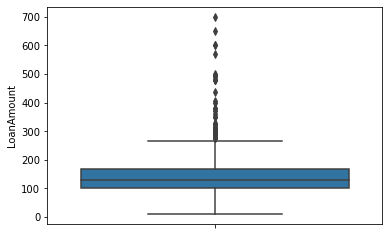

In [19]:
#numeric values check outliers are there
sns.boxplot(y='LoanAmount',data=credit)

In [20]:
credit['LoanAmount']=credit['LoanAmount'].fillna(credit['LoanAmount'].median())

<AxesSubplot:ylabel='Loan_Amount_Term'>

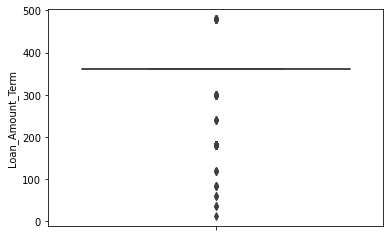

In [21]:
sns.boxplot(y='Loan_Amount_Term',data=credit)

In [22]:
credit['Loan_Amount_Term']=credit['Loan_Amount_Term'].fillna(credit['Loan_Amount_Term'].median())

<AxesSubplot:ylabel='Credit_History'>

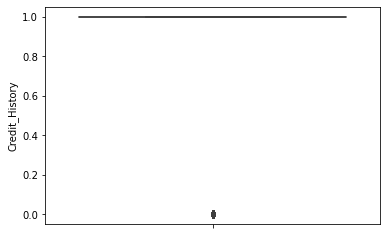

In [23]:
sns.boxplot(y='Credit_History',data=credit)

In [24]:
credit['Credit_History']=credit['Credit_History'].fillna(credit['Credit_History'].median())

In [25]:
credit.isnull().sum()/len(credit) *100

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [26]:
#2)Encoding
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [27]:
#Label Encoding
credit['Gender']=credit['Gender'].astype('category')
credit['Gender']=credit['Gender'].cat.codes

credit['Married']=credit['Married'].astype('category')
credit['Married']=credit['Married'].cat.codes

credit['Dependents']=credit['Dependents'].astype('category')
credit['Dependents']=credit['Dependents'].cat.codes

credit['Education']=credit['Education'].astype('category')
credit['Education']=credit['Education'].cat.codes

credit['Self_Employed']=credit['Self_Employed'].astype('category')
credit['Self_Employed']=credit['Self_Employed'].cat.codes

credit['Property_Area']=credit['Property_Area'].astype('category')
credit['Property_Area']=credit['Property_Area'].cat.codes

credit['Loan_Status']=credit['Loan_Status'].astype('category')
credit['Loan_Status']=credit['Loan_Status'].cat.codes #Loan_Status is the dependent variable just convertimng inmto label encoder codes


In [28]:
credit.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [29]:
#One Hot Encoding
credit=pd.get_dummies(credit,columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area'])

In [30]:
credit.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_0,Gender_1,Married_0,Married_1,...,Dependents_1,Dependents_2,Dependents_3,Education_0,Education_1,Self_Employed_0,Self_Employed_1,Property_Area_0,Property_Area_1,Property_Area_2
0,5849,0.0,128.0,360.0,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


In [31]:
#Dummy Variable
credit.drop(columns=['Gender_0','Married_0','Dependents_0','Education_0','Self_Employed_0','Property_Area_0'],inplace=True,axis=1)

In [32]:
credit.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_1,Married_1,Dependents_1,Dependents_2,Dependents_3,Education_1,Self_Employed_1,Property_Area_1,Property_Area_2
0,5849,0.0,128.0,360.0,1.0,1,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,0,0,0,1


In [33]:
#3)Feature Scaling
#Dividing data into dependent and independent
x=credit.drop(['Loan_Status'],axis=1)

In [34]:
y=credit['Loan_Status']

In [35]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_1,Married_1,Dependents_1,Dependents_2,Dependents_3,Education_1,Self_Employed_1,Property_Area_1,Property_Area_2
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1


In [36]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int8

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.07299082, -0.55448733, -0.21124125, ..., -0.39260074,
        -0.7820157 ,  1.42814704],
       [-0.13441195, -0.03873155, -0.21124125, ..., -0.39260074,
        -0.7820157 , -0.70020801],
       [-0.39374734, -0.55448733, -0.94899647, ...,  2.54711697,
        -0.7820157 ,  1.42814704],
       ...,
       [ 0.43717437, -0.47240418,  1.27616847, ..., -0.39260074,
        -0.7820157 ,  1.42814704],
       [ 0.35706382, -0.55448733,  0.49081614, ..., -0.39260074,
        -0.7820157 ,  1.42814704],
       [-0.13441195, -0.55448733, -0.15174486, ...,  2.54711697,
         1.2787467 , -0.70020801]])

In [38]:
x=pd.DataFrame(x_scaled)

In [39]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.072991,-0.554487,-0.211241,0.273231,0.411733,0.472343,-1.372089,-0.446339,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,1.428147
1,-0.134412,-0.038732,-0.211241,0.273231,0.411733,0.472343,0.728816,2.240448,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,-0.700208
2,-0.393747,-0.554487,-0.948996,0.273231,0.411733,0.472343,0.728816,-0.446339,-0.443713,-0.300975,-0.528362,2.547117,-0.782016,1.428147
3,-0.462062,0.251980,-0.306435,0.273231,0.411733,0.472343,0.728816,-0.446339,-0.443713,-0.300975,1.892641,-0.392601,-0.782016,1.428147
4,0.097728,-0.554487,-0.056551,0.273231,0.411733,0.472343,-1.372089,-0.446339,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,1.428147


In [40]:
#4)Checking Imbalance Dataset
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [41]:
#Since 422>=2*192 --> Imbalance Dataset

In [42]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(x,y)

In [43]:
print(x_smote.shape)
print(y_smote.shape)

(844, 14)
(844,)


In [44]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,train_size=0.75,random_state=101)

In [45]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(633, 14)
(633,)
(211, 14)
(211,)


In [52]:
#Building the SVM Model
#Linear Model
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear',random_state=0)
svm_linear.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [58]:
y_pred_svm_linear_train=svm_linear.predict(x_train)
y_pred_svm_linear_test=svm_linear.predict(x_test)

In [59]:
#Checking the model
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_train,y_pred_svm_linear_train))
print("###"*20)
print(classification_report(y_test,y_pred_svm_linear_test))

              precision    recall  f1-score   support

           0       0.96      0.44      0.60       311
           1       0.64      0.98      0.78       322

    accuracy                           0.72       633
   macro avg       0.80      0.71      0.69       633
weighted avg       0.80      0.72      0.69       633

############################################################
              precision    recall  f1-score   support

           0       0.95      0.37      0.53       111
           1       0.58      0.98      0.73       100

    accuracy                           0.66       211
   macro avg       0.77      0.67      0.63       211
weighted avg       0.78      0.66      0.63       211



In [60]:
print(confusion_matrix(y_train,y_pred_svm_linear_train))
print("###"*20)
print(confusion_matrix(y_test,y_pred_svm_linear_test))

[[136 175]
 [  5 317]]
############################################################
[[41 70]
 [ 2 98]]


In [61]:
print(accuracy_score(y_train,y_pred_svm_linear_train))
print("###"*20)
print(accuracy_score(y_test,y_pred_svm_linear_test))

0.7156398104265402
############################################################
0.6587677725118484


In [68]:
#Sigmoid Model
svm_sigmoid=SVC(kernel='sigmoid',random_state=0)
svm_sigmoid.fit(x_train,y_train)

SVC(kernel='sigmoid', random_state=0)

In [69]:
y_pred_svm_sigmoid_train=svm_sigmoid.predict(x_train)
y_pred_svm_sigmoid_test=svm_sigmoid.predict(x_test)

In [70]:
#Checking the model
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_train,y_pred_svm_sigmoid_train))
print("###"*20)
print(classification_report(y_test,y_pred_svm_sigmoid_test))

              precision    recall  f1-score   support

           0       0.68      0.51      0.58       311
           1       0.62      0.76      0.68       322

    accuracy                           0.64       633
   macro avg       0.65      0.64      0.63       633
weighted avg       0.65      0.64      0.63       633

############################################################
              precision    recall  f1-score   support

           0       0.69      0.47      0.56       111
           1       0.57      0.77      0.65       100

    accuracy                           0.61       211
   macro avg       0.63      0.62      0.61       211
weighted avg       0.63      0.61      0.60       211



In [71]:
print(confusion_matrix(y_train,y_pred_svm_sigmoid_train))
print("###"*20)
print(confusion_matrix(y_test,y_pred_svm_sigmoid_test))

[[159 152]
 [ 76 246]]
############################################################
[[52 59]
 [23 77]]


In [72]:
print(accuracy_score(y_train,y_pred_svm_sigmoid_train))
print("###"*20)
print(accuracy_score(y_test,y_pred_svm_sigmoid_test))

0.6398104265402843
############################################################
0.6113744075829384


In [75]:
#Polymomial Model
svm_polynomial=SVC(kernel='poly',random_state=0)
svm_polynomial.fit(x_train,y_train)

SVC(kernel='poly', random_state=0)

In [76]:
y_pred_svm_poly_train=svm_polynomial.predict(x_train)
y_pred_svm_poly_test=svm_polynomial.predict(x_test)

In [78]:
print(accuracy_score(y_train,y_pred_svm_poly_train))
print("###"*20)
print(accuracy_score(y_test,y_pred_svm_poly_test))

0.7962085308056872
############################################################
0.7298578199052133


In [79]:
#RBF Model
svm_rbf=SVC(kernel='rbf',random_state=0)
svm_rbf.fit(x_train,y_train)

SVC(random_state=0)

In [80]:
y_pred_svm_rbf_train=svm_rbf.predict(x_train)
y_pred_svm_rbf_test=svm_rbf.predict(x_test)

In [81]:
print(accuracy_score(y_train,y_pred_svm_rbf_train))
print("###"*20)
print(accuracy_score(y_test,y_pred_svm_rbf_test))

0.7914691943127962
############################################################
0.7393364928909952


In [ ]:
#RBF is better model


In [85]:
#Use cross validation or GridSearch to improve accuracy
#Cross Validation
from sklearn.model_selection import cross_val_score
accuracy_rbf_test=cross_val_score(svm_rbf,x_test,y_test,cv=15)
accuracy_rbf_train=cross_val_score(svm_rbf,x_train,y_train,cv=15)
print(accuracy_rbf_test[0])
print('####'*20)
print(accuracy_rbf_train[0])

0.8
################################################################################
0.8837209302325582


In [ ]:
#Grid Search CV

In [86]:
from sklearn.model_selection import GridSearchCV


In [87]:
#Create a dictionary called parameter grid and fill out some parameters for C and Gamma

In [89]:
param_grid={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}
#C is cost or loss or error of misclassification and gamma influence the sample on deciding effective hyperplane
#Hyperpane means best seggregation happens
#C is higher it is better,gamma lower then it is better--> we are looking for better optimum value
grid=GridSearchCV(SVC(),param_grid,refit=True)#SVC is the estimator 
grid.fit(x_train,y_train)
grid_predict=grid.predict(x_test)

In [90]:
print(accuracy_score(y_test,grid_predict))

0.7582938388625592


In [91]:
#best hyper parameter tunning
print('Best Tuned Hyper Parameter k:{}'.format(grid.best_params_))

Best Tuned Hyper Parameter k:{'C': 10, 'gamma': 0.1}


In [93]:
param_grid1={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf','poly']}
#in kernel rbf and polynomial i got better accuracy so ony checking for those.
#C=4 values
#gamma=4 values 
#Kernel=2 values
#So params getting created =4*4*2=32 parameters
grid1=GridSearchCV(SVC(),param_grid1,refit=True)#SVC is the estimator 
grid1.fit(x_train,y_train)
grid1_predict1=grid.predict(x_test)

In [94]:
print(accuracy_score(y_test,grid1_predict1))

0.7582938388625592


In [95]:
#best hyper parameter tunning
print('Best Tuned Hyper Parameter k:{}'.format(grid1.best_params_))

Best Tuned Hyper Parameter k:{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
